In [44]:
import numpy as np
import pandas as pd
import tellurium as te
import matplotlib.pyplot as plt

In [227]:
model = '''
    S1 = 5 * dilution_factor;
    S2 = 1 * dilution_factor;
    S3 = 1.3 * dilution_factor;
    S4 = 0.8 * dilution_factor;

    E1 = 4.2 * dilution_factor;
    E2 = 3.7 * dilution_factor;
    E3 = 5 * dilution_factor;
    E4 = 4.4 * dilution_factor;

    ATP = 1.6 * dilution_factor;
    ADP = 0.08 * dilution_factor;

    dilution_factor = 1

    J0_k3 = 2
    J1_k3 = 1.3
    J2_k3 = 2.5
    J3_k3 = 0.4
    J4_k3 = 2.2

    J0: S1 + E1 -> E1 + S2; J0_k3*S1*E1
    J1: S2 + E2 -> E2 + S3; J1_k3*S2
    J2: S3 + E3 + ATP -> E3 + S4 + ADP; J2_k3*S3*ATP
    J3: S4 + E4 -> E4 + S5; J3_k3*S4
'''

In [228]:
r = te.loada(model)

In [152]:
d_factors = [1/400, 1/200, 1/100, 1/50, 1/10, 1/4, 1/2, 3/4, 1]

In [235]:
rateslist = []
for d in d_factors:
    r.reset()
    r.setValue('init(dilution_factor)', d)

    rates = r.getReactionRates()  # shape: (n_species,)
    rateslist.append(rates)

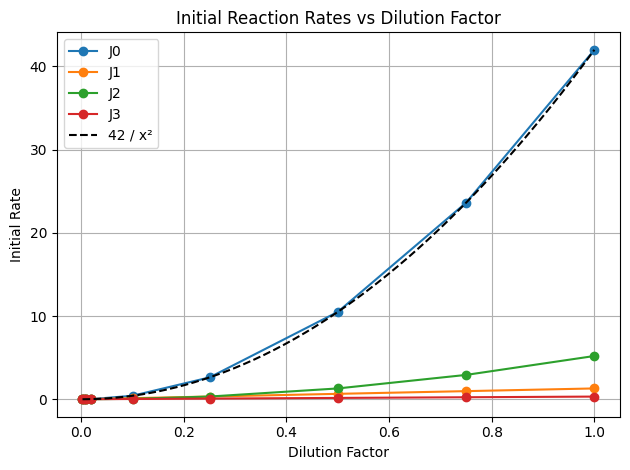

In [231]:
# Transpose to get one list per reaction (J0, J1, etc.)
rates_by_reaction = list(zip(*rateslist))

# Plot each reaction line
for i, reaction_rates in enumerate(rates_by_reaction):
    plt.plot(d_factors, reaction_rates, marker='o', label=f'J{i}')

# Add line for y = 42 / x^2
x_vals = np.linspace(min(d_factors), max(d_factors), 300)
y_vals = 42 / ((1/x_vals) ** 2)
plt.plot(x_vals, y_vals, linestyle='--', color='black', label='42 / x²')

# Final plot formatting
plt.xlabel('Dilution Factor')
plt.ylabel('Initial Rate')
plt.title('Initial Reaction Rates vs Dilution Factor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [226]:
r.reset()
ratesbydf = []
for d in d_factors:
    print(d)
    t = 1
    rateslist = []

    while t < 30:
        r.reset()
        r.setValue('init(dilution_factor)', d)
        r.simulate(0, t)
        rates = r.getReactionRates()  # shape: (n_species,)
        rateslist.append(rates)
        t += 1

    # Convert to array: rows = time points, cols = species
    rates_array = np.array(rateslist)

    print(rates_array)

    ratesbydf.append(rates_array)

# Time points corresponding to each row in rateslist
time_points = list(range(1, len(rateslist) + 1))  # [1, 2, ..., 29]

0.0025
[[2.57044978e-04 1.07427457e-03 5.08402342e-05 5.50788293e-04]
 [2.51703317e-04 4.77411421e-04 5.65754348e-05 3.87137249e-04]
 [2.46472662e-04 3.10907604e-04 5.88060457e-05 2.78596471e-04]
 [2.41350705e-04 2.61771601e-04 5.99997532e-05 2.06360889e-04]
 [2.36335187e-04 2.44701369e-04 6.08252398e-05 1.58260125e-04]
 [2.31423897e-04 2.36446557e-04 6.14664413e-05 1.26254545e-04]
 [2.26614669e-04 2.30669114e-04 6.19769239e-05 1.04988215e-04]
 [2.21905382e-04 2.25640032e-04 6.23751879e-05 9.08812704e-05]
 [2.17293958e-04 2.20886945e-04 6.26702542e-05 8.15381131e-05]
 [2.12778365e-04 2.16278928e-04 6.28685312e-05 7.53552443e-05]
 [2.08356610e-04 2.11779685e-04 6.29756292e-05 7.12600725e-05]
 [2.04026744e-04 2.07377247e-04 6.29968580e-05 6.85348206e-05]
 [1.99786857e-04 2.03067321e-04 6.29373372e-05 6.67008465e-05]
 [1.95635079e-04 1.98847269e-04 6.28020283e-05 6.54383987e-05]
 [1.91569579e-04 1.94714987e-04 6.25957358e-05 6.45349289e-05]
 [1.87588565e-04 1.90668599e-04 6.23231049e-05 6

In [241]:
ref

array([6.90593430e-01, 4.64151895e-01, 3.11130301e-01, 2.08556879e-01,
       1.39799859e-01, 9.37106486e-02, 6.28161213e-02, 4.21069056e-02,
       2.82251031e-02, 1.89198530e-02, 1.26823571e-02, 8.50123849e-03,
       5.69855043e-03, 3.81985263e-03, 2.56052381e-03, 1.71637064e-03,
       1.15051831e-03, 7.71215764e-04, 5.16963618e-04, 3.46532381e-04,
       2.32286795e-04, 1.55708301e-04, 1.04374824e-04, 6.99647677e-05,
       4.68986633e-05, 3.14374114e-05, 2.10731214e-05, 1.41254361e-05,
       9.46857101e-06])

In [246]:
(ref) / (2**2)

array([1.72648357e-01, 1.16037974e-01, 7.77825754e-02, 5.21392197e-02,
       3.49499648e-02, 2.34276621e-02, 1.57040303e-02, 1.05267264e-02,
       7.05627577e-03, 4.72996324e-03, 3.17058927e-03, 2.12530962e-03,
       1.42463761e-03, 9.54963157e-04, 6.40130954e-04, 4.29092660e-04,
       2.87629578e-04, 1.92803941e-04, 1.29240904e-04, 8.66330954e-05,
       5.80716988e-05, 3.89270753e-05, 2.60937061e-05, 1.74911919e-05,
       1.17246658e-05, 7.85935285e-06, 5.26828034e-06, 3.53135903e-06,
       2.36714275e-06])

In [250]:
ratesbydf[6][:, 3]

array([3.44146085e-01, 2.44044386e-01, 1.63637076e-01, 1.09689249e-01,
       7.35269096e-02, 4.92865558e-02, 3.30377721e-02, 2.21458804e-02,
       1.48448264e-02, 9.95078570e-03, 6.67021131e-03, 4.47117577e-03,
       2.99711859e-03, 2.00902873e-03, 1.34669227e-03, 9.02714972e-04,
       6.05108141e-04, 4.05616703e-04, 2.71893526e-04, 1.82256633e-04,
       1.22169785e-04, 8.18930626e-05, 5.48948412e-05, 3.67972909e-05,
       2.46659500e-05, 1.65341062e-05, 1.10831611e-05, 7.42927990e-06,
       4.98000572e-06])

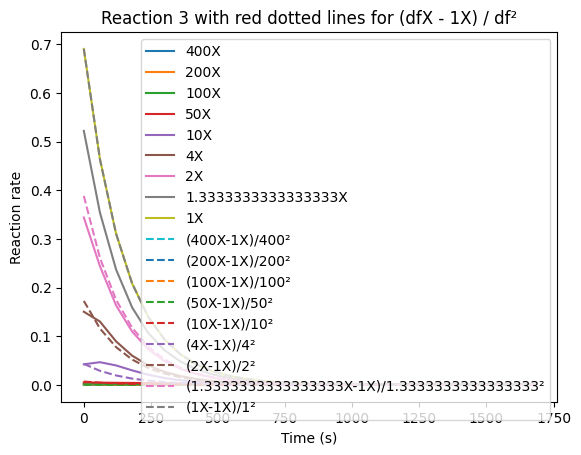

In [243]:
# Example dilution factors and time
dilution_factors = [400, 200, 100, 50, 10, 4, 2, 4/3, 1]  # or however many you have
time = np.linspace(0, 28*60, len(ratesbydf[0]))  # assuming same number of timepoints

# Choose the reaction index to plot (e.g., 0 for first reaction)
rxn_idx = 3

# Plot original curves (solid lines)
for i, df in enumerate(dilution_factors):
    plt.plot(time, ratesbydf[i][:, rxn_idx], label=f'{df}X')

# Calculate and plot the red dotted equation for each dilution factor (except 1X)
ref = ratesbydf[-1][:, rxn_idx]  # 1X rates

for i, df in enumerate(dilution_factors):
    y = (ref) / (df**2)
    plt.plot(time, y, '--', label=f'({df}X-1X)/{df}²')

plt.xlabel('Time (s)')
plt.ylabel('Reaction rate')
plt.legend()
plt.title(f'Reaction {rxn_idx} with red dotted lines for (dfX - 1X) / df²')
plt.show()

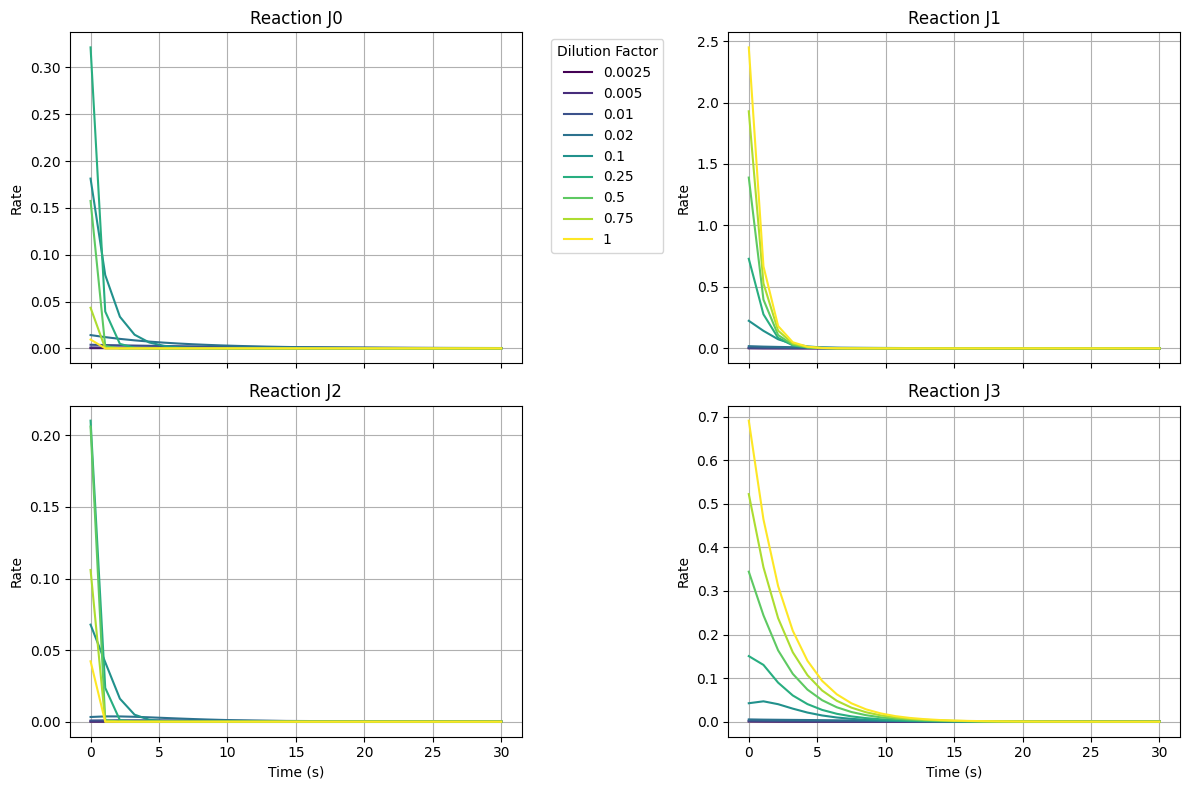

In [237]:
# Time points (assumed evenly spaced over 30 seconds)
time_points = np.linspace(0, 30, 29)
d_factors = [1/400, 1/200, 1/100, 1/50, 1/10, 1/4, 1/2, 3/4, 1]
reaction_labels = ['J0', 'J1', 'J2', 'J3']

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
axs = axs.flatten()

# Choose colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(ratesbydf)))

# Plot each reaction in its subplot
for j in range(4):  # for each reaction J0-J3
    for i, df_array in enumerate(ratesbydf):  # for each dilution factor
        axs[j].plot(time_points, df_array[:, j], label=d_factors[i], color=colors[i])
    axs[j].set_title(f'Reaction {reaction_labels[j]}')
    axs[j].set_ylabel('Rate')
    axs[j].grid(True)

# Common x-axis label
for ax in axs[2:]:
    ax.set_xlabel('Time (s)')

# Add legend to one of the plots
axs[0].legend(title='Dilution Factor', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [172]:
auc_by_df = []  # rows: each dilution factor

for d in d_factors:
    t = 1
    rateslist = []

    while t < 30:
        r.reset()
        r.setValue('init(dilution_factor)', d)
        r.simulate(0, t)
        rates = r.getReactionRates()  # shape: (n_species,)
        rateslist.append(rates)
        t += 1

    # Convert to array: rows = time points, cols = species
    rates_array = np.array(rateslist)

    # Time points corresponding to each row in rateslist
    time_points = list(range(1, len(rateslist) + 1))  # [1, 2, ..., 29]

    # Transpose to get rates for each species across time
    species_rates = rates_array.T

    # Integrate each species across time (axis=1 since now rows = species)
    aucs = [np.trapz(y=values, x=time_points) for values in species_rates]

    auc_by_df.append(aucs)

In [173]:
# Convert to DataFrame
auc_df = pd.DataFrame(auc_by_df, index=d_factors)
auc_df.columns = [f'J{i}' for i in range(auc_df.shape[1])]

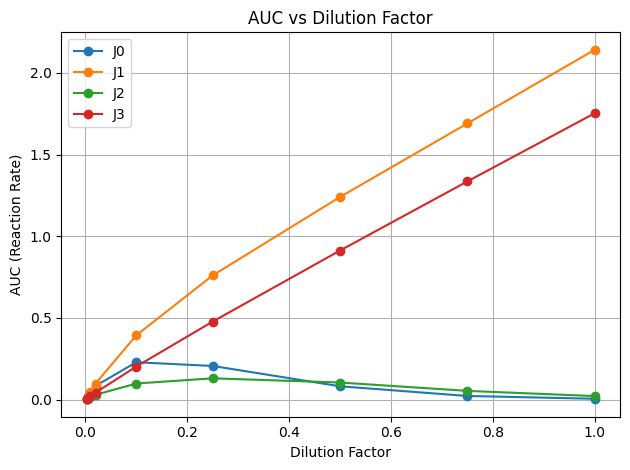

In [174]:
for col in auc_df.columns:
    plt.plot(auc_df.index, auc_df[col], marker='o', label=col)

plt.xlabel('Dilution Factor')
plt.ylabel('AUC (Reaction Rate)')
plt.title('AUC vs Dilution Factor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

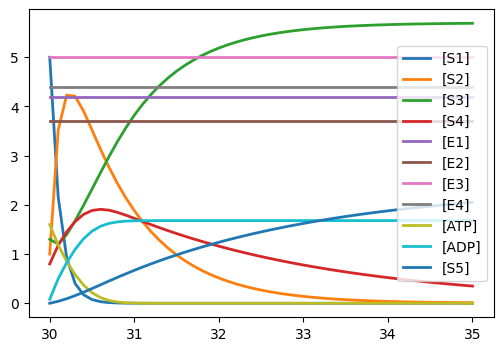

In [175]:
r.reset()
r.simulate(30)
r.plot()